# Validate Video Data

Code authored by: Shaw Talebi<br>

Blog link: https://medium.com/towards-data-science/how-to-build-data-pipelines-for-machine-learning-b97bbef050a5 <br>
Video link: https://youtu.be/OnIQrDiTtRM

### imports

In [1]:
import polars as pl
import matplotlib.pyplot as plt

### read data

In [2]:
df = pl.read_parquet('data/video-transcripts.parquet')

### sizes

In [3]:
# shape + unique values
print("shape:", df.shape)
print("n unique rows:", df.n_unique())
for j in range(df.shape[1]):
    print("n unique elements (" + df.columns[j] + "):", df[:,j].n_unique())

shape: (111, 4)
n unique rows: 111
n unique elements (video_id): 111
n unique elements (datetime): 111
n unique elements (title): 111
n unique elements (transcript): 109


In [4]:
print("Total number of title characters:", sum(len(df['title'][i]) for i in range(len(df))))
print("Total number of transcript characters:", sum(len(df['transcript'][i]) for i in range(len(df))))

Total number of title characters: 5809
Total number of transcript characters: 1246470


### dtypes

In [5]:
# change datetime to Datetime dtype
df = df.with_columns(pl.col('datetime').cast(pl.Datetime))
print(df.head())

shape: (5, 4)
┌─────────────┬─────────────────────┬───────────────────────────────┬──────────────────────────────┐
│ video_id    ┆ datetime            ┆ title                         ┆ transcript                   │
│ ---         ┆ ---                 ┆ ---                           ┆ ---                          │
│ str         ┆ datetime[μs]        ┆ str                           ┆ str                          │
╞═════════════╪═════════════════════╪═══════════════════════════════╪══════════════════════════════╡
│ Ot2c5MKN_-w ┆ 2024-11-20 13:31:14 ┆ Multimodal AI: LLMs that can  ┆ multimodal models are        │
│             ┆                     ┆ s…                            ┆ capable …                    │
│ gUJJB235DVs ┆ 2024-11-18 15:11:07 ┆ 5 AI Projects You Can Build   ┆ five AI project ideas that   │
│             ┆                     ┆ Th…                           ┆ you…                         │
│ bAe4qwQGxlI ┆ 2024-10-25 13:18:08 ┆ I Built an AI App in 4        ┆ I built

#### character lengths

(array([ 3.,  5., 16., 20., 17., 24., 14.,  9.,  1.,  2.]),
 array([16. , 23.8, 31.6, 39.4, 47.2, 55. , 62.8, 70.6, 78.4, 86.2, 94. ]),
 <BarContainer object of 10 artists>)

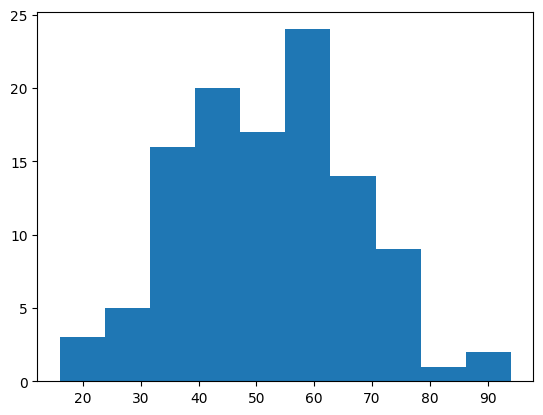

In [6]:
# lengths/character counts
plt.hist(df['title'].str.len_chars())

(array([41., 14., 21., 12., 12.,  5.,  2.,  1.,  2.,  1.]),
 array([3.00000e+00, 5.00610e+03, 1.00092e+04, 1.50123e+04, 2.00154e+04,
        2.50185e+04, 3.00216e+04, 3.50247e+04, 4.00278e+04, 4.50309e+04,
        5.00340e+04]),
 <BarContainer object of 10 artists>)

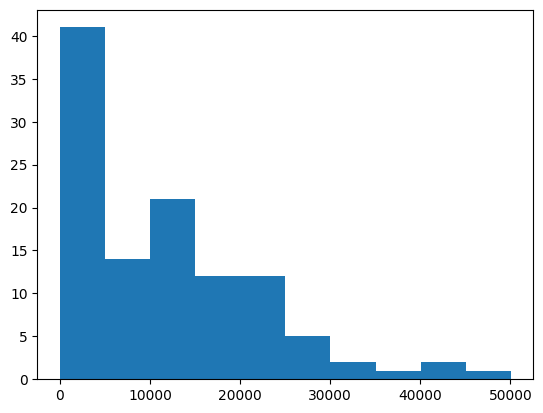

In [7]:
plt.hist(df['transcript'].str.len_chars())

### handling special strings

In [8]:
print(df['title'][3])
print(df['transcript'][3])

Fine-Tuning BERT for Text Classification (Python Code)
massive Transformer models like GPT 40 llama and Claude are the current state-of-the-art in AI however many of the problems we care about do not require a 100 billion parameter model there are countless problems we can solve with smaller language models in this video I'm going to share one example of this by fine-tuning Bert to classify fishing URLs I'll start by covering some key Concepts then walk through example python code and if you're new here welcome I'm sha I make videos about data science and Entrepreneurship if you enjoy this content please consider clicking the Subscribe button that's a great no cost way you can support me in all the videos that I make so the title this video has a few pieces of jargon fine-tuning bird and text classification so let's talk about each of these terms one by one starting with fine-tuning this is when we adapt a pre-trained model to a particular task through additional training using an anal

In [9]:
special_strings = ['&#39;', '&amp;', 'sha ']
special_string_replacements = ["'", "&", "Shaw "]

for i in range(len(special_strings)):
    df = df.with_columns(df['title'].str.replace(special_strings[i], special_string_replacements[i]).alias('title'))
    df = df.with_columns(df['transcript'].str.replace(special_strings[i], special_string_replacements[i]).alias('transcript'))

In [10]:
print(df['title'][3])
print(df['transcript'][3])

Fine-Tuning BERT for Text Classification (Python Code)
massive Transformer models like GPT 40 llama and Claude are the current state-of-the-art in AI however many of the problems we care about do not require a 100 billion parameter model there are countless problems we can solve with smaller language models in this video I'm going to share one example of this by fine-tuning Bert to classify fishing URLs I'll start by covering some key Concepts then walk through example python code and if you're new here welcome I'm Shaw I make videos about data science and Entrepreneurship if you enjoy this content please consider clicking the Subscribe button that's a great no cost way you can support me in all the videos that I make so the title this video has a few pieces of jargon fine-tuning bird and text classification so let's talk about each of these terms one by one starting with fine-tuning this is when we adapt a pre-trained model to a particular task through additional training using an ana

### write data

In [11]:
# write data to file
df.write_parquet('data/video-transcripts.parquet')
df.write_csv('data/video-transcripts.csv')